# Introduction to Pandas

This tutorial is partially based on the ["Solving real world data science tasks with Python Pandas!"](https://github.com/KeithGalli/Pandas-Data-Science-Tasks) tutorial, by Keith Galli.

The [Sales dataset](https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data) used in this tutorial comes from the aforementioned Keith's tutorial.

## Import necessary libraries

In [1]:
from pathlib import Path
from sys import stderr
import matplotlib.pyplot as plt
import pandas as pd

## Load and explore sales data for one month 

### Load sales data from a csv file

The data is stored in the 'monthly_sales' subdirectory, within the 'data' directory. Load the data from the 'Sales_January_2019' csv file, from the 'sales_data' directory 

In [2]:
jan_sales = pd.read_csv(Path.cwd()/'../data/monthly_sales/Sales_January_2019.csv')

In [3]:
jan_sales.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


First, get the size of the dataframe, that is, the number of rows and columns

In [5]:
jan_sales.shape # 9723 reda i 6 kolona

(9723, 6)

Access the columns' names

In [8]:
jan_sales.columns.to_list()

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

Examine the columns' data types

In [9]:
jan_sales.info() # vidimo da su sve kolone tipa object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


A nice overview of pandas' data types can be found, for example, in [this article](https://pbpython.com/pandas_dtypes.html).

### Examine the missing values

To do that, we'll use the `isna()` method

In [12]:
jan_sales.isna().sum() # 26 redova nedostajucih vrednosti u svim kolonama

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

#### Remove rows with all missing values

This can be done with the `dropna()` method

In [13]:
jan_sales.dropna(how='all',inplace=True) # ako postoje celi redovi nedostajucih vrednosti, onda ih obrisi

In [15]:
jan_sales.isna().sum().sum()

0

### Subset the data frame or select particular rows / columns

This can be done in different ways; the recommended practice is to use Dataframe methods `loc` or `iloc`.

When doing the selection based on the ordinal number of rows and columns, `iloc` should be used.

When the selection is to be based on a condition to be evaluated against rows and / or columns are to be selected based on their names, `loc` should be used. 

**Example 1**: select first 3 columns and first 6 rows

In [25]:
jan_sales.iloc[:5,:3]

,Order ID,Product,Quantity Ordered
0,141234,iPhone,1
1,141235,Lightning Charging Cable,1
2,141236,Wired Headphones,2
3,141237,27in FHD Monitor,1
4,141238,Wired Headphones,1


**Example 2**: select the last 5 rows and 1st, 2nd and 5th column

In [29]:
jan_sales.iloc[:-5,[0,1,4]]

,Order ID,Product,Order Date
0,141234,iPhone,01/22/19 21:25
1,141235,Lightning Charging Cable,01/28/19 14:15
2,141236,Wired Headphones,01/17/19 13:33
3,141237,27in FHD Monitor,01/05/19 20:33
4,141238,Wired Headphones,01/25/19 11:59
...,...,...,...
9713,150492,Wired Headphones,01/03/19 21:54
9714,150493,Lightning Charging Cable,01/08/19 15:10
9715,150494,AAA Batteries (4-pack),01/05/19 21:27
9716,150495,Bose SoundSport Headphones,01/15/19 09:33


**Example 3**: Select Order ID, Order Date, and Purchase Address for orders coming from Boston

Note: we can use `str` to get the string value of a pandas Series (the 'Purchase Address' column, in this case), so that we can call any string method on it.

In [34]:
jan_sales.loc[jan_sales['Purchase Address'].str.contains('Boston'),['Order ID','Order Date','Purchase Address']]

,Order ID,Order Date,Purchase Address
0,141234,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
17,141251,01/24/19 08:13,"414 Walnut St, Boston, MA 02215"
29,141263,01/11/19 23:33,"640 Spruce St, Boston, MA 02215"
31,141265,01/01/19 16:52,"853 Ridge St, Boston, MA 02215"
37,141271,01/30/19 10:51,"90 13th St, Boston, MA 02215"
...,...,...,...
9627,150409,01/10/19 02:38,"410 Forest St, Boston, MA 02215"
9660,150440,01/10/19 19:19,"82 Johnson St, Boston, MA 02215"
9666,150445,01/11/19 13:56,"147 Lincoln St, Boston, MA 02215"
9694,150473,01/10/19 09:09,"148 Hickory St, Boston, MA 02215"


**Example 4**: Select Order ID, Product and Price Each for orders where the ordered quantity is at least 3

Note that even though the Quantity Ordered column stores numeric information, its values are encoded as strings: 

In [38]:
jan_sales['Quantity Ordered']=pd.to_numeric(jan_sales['Quantity Ordered'],errors='coerce')

Now, we can do the intended selection:

In [40]:
jan_sales.loc[jan_sales['Quantity Ordered']>=3,['Order ID','Product','Price Each']]

,Order ID,Product,Price Each
12,141246,AAA Batteries (4-pack),2.99
52,141285,AAA Batteries (4-pack),2.99
58,141290,AA Batteries (4-pack),3.84
73,141305,AAA Batteries (4-pack),2.99
84,141316,AAA Batteries (4-pack),2.99
...,...,...,...
9513,150299,AA Batteries (4-pack),3.84
9590,150372,AAA Batteries (4-pack),2.99
9636,150417,Wired Headphones,11.99
9659,150439,Wired Headphones,11.99


## Load sales data for all months in 2019 and merge them into one data set

We need to load the sales data from all csv files (one for each month) available in the 'sales_data' directory. 

Let's first see how to take only .csv files from a given directory:

In [59]:
def get_csv_files(fpath):
    csv_files=[]
    if not fpath.is_dir():
        stderr.write("Fpath nije direktorijum!")
        return
    for f in fpath.iterdir():
        if f.is_dir(): continue
        if f.suffix == '.csv':
            csv_files.append(f)
    return csv_files

In [60]:
csv_files = get_csv_files(Path.cwd()/'../data/monthly_sales')

In [61]:
len(csv_files)

12

We'll now take each csv file in turn, load the data from it and add the loaded data into a common DataFrame that stores sales data for the whole year.

To merge two DataFrames, we'll use `pd.concat` function

In [62]:
sales = pd.DataFrame()
for csv_file in csv_files:
    cur_sales = pd.read_csv(csv_file)
    sales= pd.concat([sales,cur_sales])
    

In [63]:
sales.dropna(how='all', inplace=True)

### Examine the merged data

In [64]:
sales.isna().sum().sum()

0

In [66]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


Note the difference between the number of entries (rows) and the index values. It seems that some of the loaded files have overlaping indexes. To fix this, we need to reset the index of the merged data frame.

In [67]:
sales.reset_index(inplace=True) # ili odmah staviti parametar drop = True

In [69]:
sales.drop(columns=['index'], inplace=True) 

Rename the DataFrame, to reduce the typing: 

In [71]:
all_sales = sales 

Note that we are just giving a new name (reference) to the same object, that is, we are not creating a new DataFrame object with this statement. <br>
We can verify that by comparing the two data frame references:

In [72]:
all_sales is sales 

True

To create a new DataFrame object, we would need to do, for example, the following:

In [73]:
all_sales_new = all_sales.copy()

In [74]:
all_sales_new is all_sales 

False

In [75]:
sales 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## Prepare the data for analysis 

Let's take another look at the data...

Note that all the data are stored as object (string) values. We will need to change that for the Quantity Ordered, Price Each and Order Date columns. But before that, we will handle missing values.

### Remove observations with all missing values

It seems that entire rows of data are missing, that is, we have observations with all missing values. <br>Let's take a sample to check that:

In [76]:
sales.isna().sum().sum()

0

### Convert Quantity Ordered and Price Each to numeric values, and Order Date into datetime type

A useful reference for this type of conversion can be found in [this StackOverflow thread](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas)

Let's start by taking another look at the columns' data types

In [77]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


First, we'll try to convert Quantity Ordered to a numeric column

In [81]:
type(sales['Quantity Ordered'][0])

str

In [84]:
sales['Quantity_Ordered']=pd.to_numeric(sales['Quantity Ordered'], errors='coerce')

Get the number and proportion of the introduced missing values in the Quantity Ordered column

In [88]:
sales['Quantity_Ordered'].isna().sum()

355

Compute the basic statistics for the newly created numeric column

In [89]:
sales['Quantity_Ordered'].describe() # vidimo da na 75% ntorki imamo količinu naručivanja do 1

count    185950.000000
mean          1.124383
std           0.442793
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: Quantity_Ordered, dtype: float64

In [91]:
sales['Quantity_Ordered'].value_counts()

Quantity_Ordered
1.0    168552
2.0     13324
3.0      2920
4.0       806
5.0       236
6.0        80
7.0        24
8.0         5
9.0         3
Name: count, dtype: int64

Do the same for the Price Each column

In [93]:
sales['Price_Each'] = pd.to_numeric(sales['Price Each'], errors='coerce')

In [94]:
sales['Price_Each'].isna().sum()

355

In [95]:
sales['Price_Each'].describe()

count    185950.000000
mean        184.399735
std         332.731330
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        1700.000000
Name: Price_Each, dtype: float64

Drop rows where ordered quantity or unit price are unavailable (NaN)

In [96]:
sales.isna().sum()

Order ID              0
Product               0
Quantity Ordered      0
Price Each            0
Order Date            0
Purchase Address      0
Quantity_Ordered    355
Price_Each          355
dtype: int64

In [100]:
rows_to_drop = sales.loc[sales['Quantity_Ordered'].isna() | sales['Price_Each'].isna(),:].index

In [101]:
sales.drop(rows_to_drop,inplace=True)

Check the size of the dataset after the removal of rows with missing values

In [102]:
sales.shape

(185950, 8)

Finally, transform the Order Date to datetime type

In [103]:
type(sales['Order Date'][0])

str

In [104]:
sales['Order_Date'] = pd.to_datetime(sales['Order Date'],errors='coerce',format='%m/%d/%y %H:%M') 

In [106]:
sales.isna().sum().sum()

0

It seems that this transformation went well. 

Let's check the data types after the transformations done above

In [107]:
sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date                  object
Purchase Address            object
Quantity_Ordered           float64
Price_Each                 float64
Order_Date          datetime64[ns]
dtype: object

Remove columns that are no longer needed

In [108]:
sales.drop(columns=['Price Each','Quantity Ordered'], inplace=True)

In [110]:
sales.drop(columns=['Order Date'], inplace=True)

In [113]:
type(sales['Order_Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Add Purchase City column

Let's see how we can create a new column out of an existing one.

Since we may be interested in comparing sales across cities, we will add a column with the name of the city where the order was made. The city name should be followed by the state label, given in brackets (e.g. 'Atlanta (GA)'), to disambigute cities with common names.   

Primer kako ćemo kreirati funkciju

In [117]:
street, city, state = sales['Purchase Address'][0].split(', ')
state, code = state.split(' ')
result = city + ' ('+state+')'
result

'Dallas (TX)'

In [118]:
def get_city_state(purchase_address):
    street, city, state = purchase_address.split(', ')
    state, code = state.split(' ')
    result = city + ' ('+state+')'
    return result

In [120]:
sales['City_State']=sales['Purchase Address'].apply(get_city_state)

Save the transformed dataset to a file so that we do not have to go through the data cleaning and transformation step again

In [121]:
sales.to_csv(Path.cwd()/'../data/monthly_sales/all_sales_2019.csv', index=False)

## Exploratory data analysis

Let's now try to answer some sales-related questions by exploring the 2019 sales data

### Task 1. What was the best month for sales? How much was earned that month?

To answer this question, we need to:
- compute total revenue per order
- extract month from the Order Date, so that we can group orders on the montly basis
- compute total revenue per month

**Step 1**: Compute total revenue per order

In [122]:
sales['Total_Revenue']=sales['Quantity_Ordered']*sales['Price_Each']

**Step 2**: Extract month from the Order Date

Note that Order Date is a datetime Series. We can use `dt` to get access to each value in the Series as a datetime object. <br>Having access to a particular order date as a datetime object, we can take any element of the order date and time through appropriate fields (year, month, day, etc.)

In [126]:
sales['Month']=sales['Order_Date'].dt.month

**Step 3**: Compute total revenue per month

In [129]:
monthly_revenue = sales.groupby('Month')['Total_Revenue'].sum().sort_values(ascending=False)

Sort the results in the decreasing order of monthly total revenue

In [130]:
monthly_revenue

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Total_Revenue, dtype: float64

We can see that the last month, December, had the highest revenue and that it was ~4.6M USD.

We can also examine monthly revenues on a (bar) chart, as visual representation of data often facilitates the comprehension of trends that may be present in the data.

For plotting, we will use the Matplotlib library. Its documentation is available [here](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html), while [this example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py) can be helpful as the starting point for this task.

Note: [This GitHub repo](https://github.com/matplotlib/cheatsheets) offers very well done cheat sheets and tips for Mathplotlib

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_4452\1912203406.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fg.show()


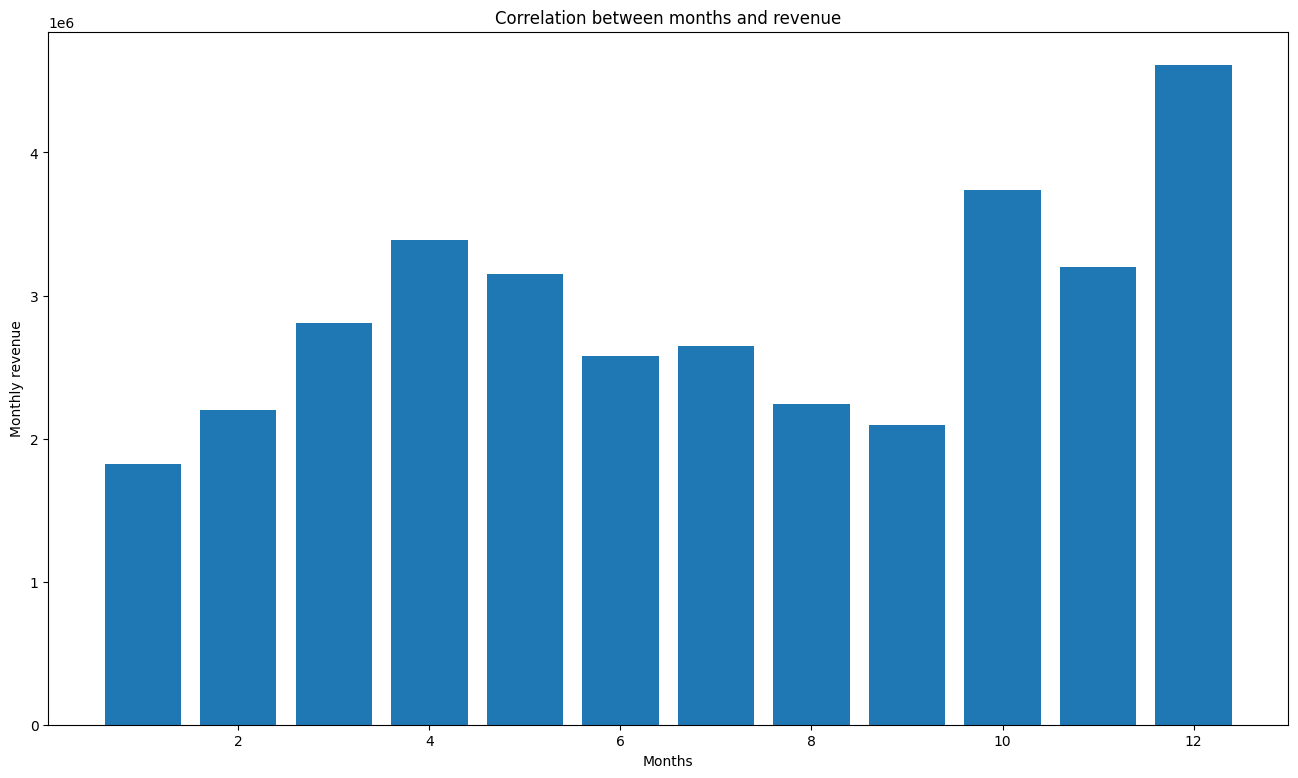

In [136]:
fg, ax = plt.subplots(figsize=(16,9))
x = monthly_revenue.index
y = monthly_revenue.values
ax.bar(x,y)
ax.set_xlabel('Months')
ax.set_ylabel('Monthly revenue')
ax.set_title('Correlation between months and revenue')
fg.show()

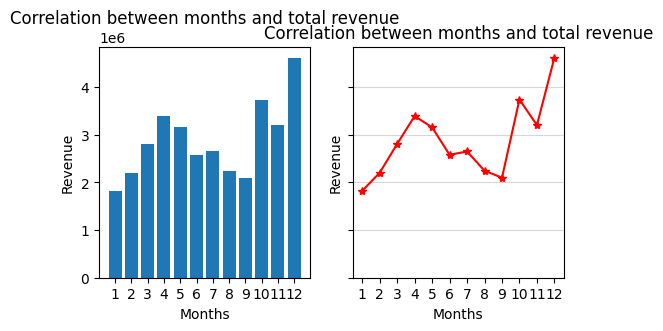

In [151]:
fg, (ax1, ax2) = plt.subplots(figsize=(6,3), ncols=2, sharey=True)
#ax1.set_title('Correlation between months and total revenue')
ax1.bar(x,y)
ax1.set_xlabel('Months')
ax1.set_ylabel('Revenue')
ax1.set_title('Correlation between months and total revenue')
ax1.set_xticks(range(1,13))
monthly_revenue_unsorted = sales.groupby('Month')['Total_Revenue'].sum()
x1 = monthly_revenue_unsorted.index
y1 = monthly_revenue_unsorted.values
ax2.plot(x1,y1,marker='*', color='red')
ax2.set_xlabel('Months')
ax2.set_ylabel('Revenue')
ax2.set_xticks(range(1,13))
ax2.set_title('Correlation between months and total revenue')
ax2.grid(visible=True, axis='y', alpha=0.5)

### Task 2. What city ordered the largest quantity of products?

This time we will group orders based on the city. <br>
Recall that we have created Purchase City column out of the Purchase Address column

In [155]:
sales 

,Order ID,Product,Purchase Address,Quantity_Ordered,Price_Each,Order_Date,City_State,Total_Revenue,Month
0,176558,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2.0,11.95,2019-04-19 08:46:00,Dallas (TX),23.90,4
1,176559,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1.0,99.99,2019-04-07 22:30:00,Boston (MA),99.99,4
2,176560,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1.0,600.00,2019-04-12 14:38:00,Los Angeles (CA),600.00,4
3,176560,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1.0,11.99,2019-04-12 14:38:00,Los Angeles (CA),11.99,4
4,176561,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1.0,11.99,2019-04-30 09:27:00,Los Angeles (CA),11.99,4
...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),"840 Highland St, Los Angeles, CA 90001",3.0,2.99,2019-09-17 20:56:00,Los Angeles (CA),8.97,9
186301,259354,iPhone,"216 Dogwood St, San Francisco, CA 94016",1.0,700.00,2019-09-01 16:00:00,San Francisco (CA),700.00,9
186302,259355,iPhone,"220 12th St, San Francisco, CA 94016",1.0,700.00,2019-09-23 07:39:00,San Francisco (CA),700.00,9
186303,259356,34in Ultrawide Monitor,"511 Forest St, San Francisco, CA 94016",1.0,379.99,2019-09-19 17:30:00,San Francisco (CA),379.99,9


In [157]:
city_quantity = sales.groupby('City_State')['Quantity_Ordered'].sum()

Sort the results in the decreasing order of the per-city ordered quantity

In [159]:
city_quantity_sorted = city_quantity.sort_values(ascending=False)

Finally, plot the per-city ordered quantites on a bar chart

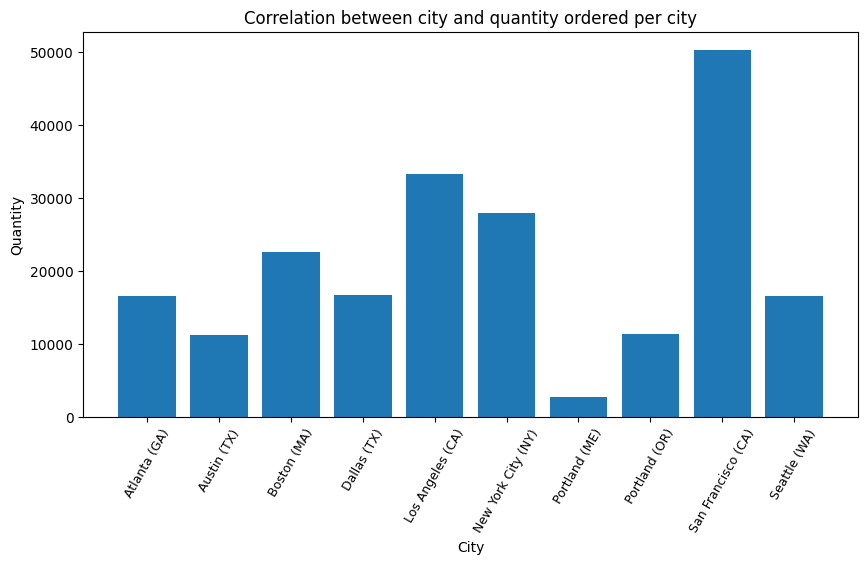

In [162]:
fg, ax = plt.subplots(figsize=(10,5))
ax.set_title('Correlation between city and quantity ordered per city')
x = city_quantity.index
y = city_quantity.values
ax.bar(x,y)
ax.set_xlabel('City')
ax.tick_params(axis='x', labelsize=9,labelrotation=60)
ax.set_ylabel('Quantity')
plt.show()

### Task 3. When, during a day, customers are likely to make most valuable orders?

To answer this one, we can extract the hour from the Order Date and examine the average total order price across the 24 hours of a day

**Step 1**: Create the 'Order Hour' column

In [165]:
sales['Hour']=sales['Order_Date'].dt.hour

In [166]:
sales.head(10)

,Order ID,Product,Purchase Address,Quantity_Ordered,Price_Each,Order_Date,City_State,Total_Revenue,Month,Hour
0,176558,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2.0,11.95,2019-04-19 08:46:00,Dallas (TX),23.90,4,8
1,176559,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1.0,99.99,2019-04-07 22:30:00,Boston (MA),99.99,4,22
2,176560,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1.0,600.00,2019-04-12 14:38:00,Los Angeles (CA),600.00,4,14
3,176560,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1.0,11.99,2019-04-12 14:38:00,Los Angeles (CA),11.99,4,14
4,176561,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1.0,11.99,2019-04-30 09:27:00,Los Angeles (CA),11.99,4,9
5,176562,USB-C Charging Cable,"381 Wilson St, San Francisco, CA 94016",1.0,11.95,2019-04-29 13:03:00,San Francisco (CA),11.95,4,13
6,176563,Bose SoundSport Headphones,"668 Center St, Seattle, WA 98101",1.0,99.99,2019-04-02 07:46:00,Seattle (WA),99.99,4,7
7,176564,USB-C Charging Cable,"790 Ridge St, Atlanta, GA 30301",1.0,11.95,2019-04-12 10:58:00,Atlanta (GA),11.95,4,10
8,176565,Macbook Pro Laptop,"915 Willow St, San Francisco, CA 94016",1.0,1700.00,2019-04-24 10:38:00,San Francisco (CA),1700.00,4,10
9,176566,Wired Headphones,"83 7th St, Boston, MA 02215",1.0,11.99,2019-04-08 14:05:00,Boston (MA),11.99,4,14


**Step 2**: Group orders per Order Hour and compute mean Total price for each group

In [168]:
hour_revenue = sales.groupby('Hour')['Total_Revenue'].mean()

Sort the results in the descending order of the mean total price

In [178]:
mean_tot_rev = sales['Total_Revenue'].mean()
hour_revenue_sorted=hour_revenue.sort_values(ascending=False)

Examine the results on a line chart

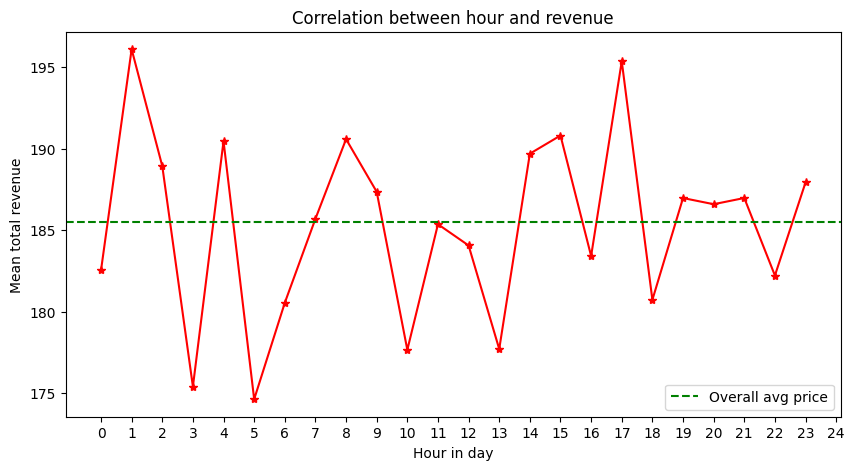

In [180]:
x = hour_revenue.index
y = hour_revenue.values 
fg, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Hour in day')
ax.set_ylabel('Mean total revenue')
ax.plot(x,y,marker='*',color='red')
ax.set_xticks(range(0,25))
ax.set_title('Correlation between hour and revenue')
plt.axhline(y=mean_tot_rev,color='green',linestyle='--',label='Overall avg price')
plt.legend(loc='lower right')
plt.show()

### Task 4. What product sold the most? What product contributed the most to the total revenue?

Let's first see how many different products there are and how frequently they were ordered

In [177]:
sales['Product'].value_counts()  # frekventnost kupovine proizvoda

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [181]:
sales.Product.nunique() # ima 19 razlicitih proizvoda

19

While the above series gives us the number of orders that a product appeared in, it does not tell us about the quantities that were ordered.

For each product, we need to take the overall quantity ordered and total price across all orders related to that product

In [182]:
total_revenue = sales['Total_Revenue'].sum()

In [198]:
product_revenue = sales.groupby('Product')[['Quantity_Ordered','Total_Revenue']].sum()

In [201]:
product_revenue.sort_values(by='Quantity_Ordered',ascending=False).head(5) # top 5 najprodavanijih po količini

,Quantity_Ordered,Total_Revenue
Product,,
AAA Batteries (4-pack),31017.0,92740.83
AA Batteries (4-pack),27635.0,106118.40
USB-C Charging Cable,23975.0,286501.25
Lightning Charging Cable,23217.0,347094.15
Wired Headphones,20557.0,246478.43


In [202]:
product_revenue.sort_values(by='Total_Revenue',ascending=False).head(5) # top 5 najprodavanijih po prihodu

,Quantity_Ordered,Total_Revenue
Product,,
Macbook Pro Laptop,4728.0,8037600.00
iPhone,6849.0,4794300.00
ThinkPad Laptop,4130.0,4129958.70
Google Phone,5532.0,3319200.00
27in 4K Gaming Monitor,6244.0,2435097.56


We can also plot these data. <br>
In particular, we will create two horizontal bar plots, one next to the other, the first one showing total revenue per product, the second depicting the quantity of the product sold. We will sort the plots based on the total revenue, so that the products with the highest revenue are displayed towards the top of the plots.

For the guidance on how to create a horizontal bar chart, see [this example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html) from the Mathplotlib documentation.

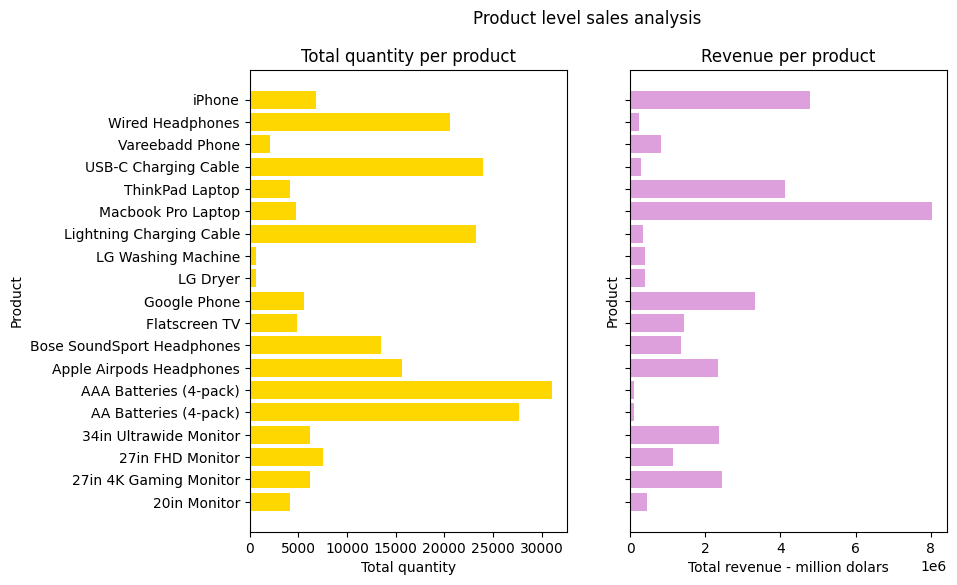

In [214]:
x = product_revenue.index
y1 = product_revenue['Quantity_Ordered'].values
y2 = product_revenue['Total_Revenue'].values
fg, (ax1, ax2) = plt.subplots(ncols=2,sharey=True, figsize=(9,6))
fg.suptitle('Product level sales analysis')
ax1.barh(x,y1,color='gold')
ax1.set_title('Total quantity per product')
ax1.set_xlabel('Total quantity')
ax1.set_ylabel('Product')
ax2.barh(x,y2,color='plum')
ax2.set_xlabel('Total revenue - million dolars')
ax2.set_ylabel('Product')
ax2.set_title('Revenue per product')
plt.show() # vidimo da najveci prihod nije donela najveca kolicina prodatih proizvoda (AAA baterije su jeftine), dok je najveci prihod doneo Macbook Pro Laptop

We can also plot this data on a single line plot, using different scales for values shown on the y-axis. 

[This example](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py) from the MatPlotLib documentation shows how have a plot with two different scales.

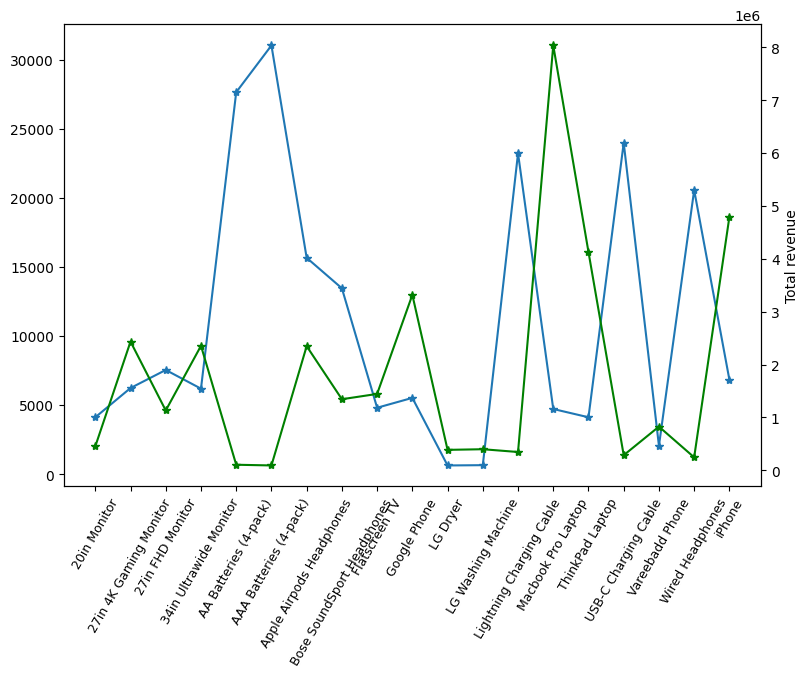

In [224]:
x = product_revenue.index
y1 = product_revenue['Quantity_Ordered'].values
y2 = product_revenue['Total_Revenue'].values
fg, ax = plt.subplots(figsize=(9,6))
ax.plot(x,y1, marker='*')
ax.tick_params(axis='x',labelsize=9,labelrotation=60)
ax2 = ax.twinx()
ax2.plot(x,y2,color='green', marker='*')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Total revenue')
plt.show()

### Task 5. Examine total revenue per product across cities

Note that we can group the data based on more than one attribute (column). <br> In this case, we will do the grouping based on the product and the city and compute total revenue for each product in each city:

In [227]:
product_city_revenue = sales.groupby(['Product','City_State'])['Total_Revenue'].sum()

Note that we are getting a Series with two indexes - Product and Purchase City:

In [229]:
product_city_revenue

Product       City_State        
20in Monitor  Atlanta (GA)            37616.58
              Austin (TX)             25297.70
              Boston (MA)             43336.06
              Dallas (TX)             37726.57
              Los Angeles (CA)        72373.42
                                       ...    
iPhone        New York City (NY)     616700.00
              Portland (ME)           55300.00
              Portland (OR)          259700.00
              San Francisco (CA)    1162700.00
              Seattle (WA)           382200.00
Name: Total_Revenue, Length: 190, dtype: float64

In [230]:
product_city_revenue.info() # multiindex serija

<class 'pandas.core.series.Series'>
MultiIndex: 190 entries, ('20in Monitor', 'Atlanta (GA)') to ('iPhone', 'Seattle (WA)')
Series name: Total_Revenue
Non-Null Count  Dtype  
--------------  -----  
190 non-null    float64
dtypes: float64(1)
memory usage: 2.7+ KB


We can transform this into a DataFrame by calling the `unstack()` method

In [234]:
prod_city_rev_df = product_city_revenue.unstack()
prod_city_rev_df

City_State,Atlanta (GA),Austin (TX),Boston (MA),Dallas (TX),Los Angeles (CA),New York City (NY),Portland (ME),Portland (OR),San Francisco (CA),Seattle (WA)
Product,,,,,,,,,,
20in Monitor,37616.58,25297.70,43336.06,37726.57,72373.42,61594.40,6489.41,24087.81,109990.00,35636.76
27in 4K Gaming Monitor,192265.07,124016.82,263243.25,187585.19,391159.97,328371.58,33149.15,136106.51,569385.40,209814.62
27in FHD Monitor,88194.12,53996.40,119542.03,88044.13,183437.77,160789.28,17098.86,62395.84,272081.86,86844.21
34in Ultrawide Monitor,183155.18,124636.72,254973.29,194554.88,362890.45,329831.32,28879.24,124256.73,549465.54,202914.66
AA Batteries (4-pack),8421.12,5468.16,11581.44,8682.24,17041.92,13939.20,1493.76,5952.00,25171.20,8367.36
AAA Batteries (4-pack),7053.41,4987.32,10348.39,7486.96,14851.33,12330.76,1070.42,5148.78,22149.92,7313.54
Apple Airpods Headphones,189900.00,133050.00,247950.00,179100.00,370950.00,314700.00,34950.00,129900.00,559950.00,188700.00
Bose SoundSport Headphones,108389.16,70692.93,141585.84,106289.37,212478.75,179382.06,17998.20,70892.91,331666.83,106189.38
Flatscreen TV,122100.00,72600.00,166200.00,126000.00,218100.00,188400.00,18600.00,75000.00,346200.00,112500.00


We can now plot this DataFrame using a heathmap. 
A handy guide for creating a heatmap is given in [this article](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py) from the Matplotlib documentation.

See [this page](https://matplotlib.org/stable/users/explain/colors/colormaps.html) of Matplotlib documentation for an overview of the predefined color maps.

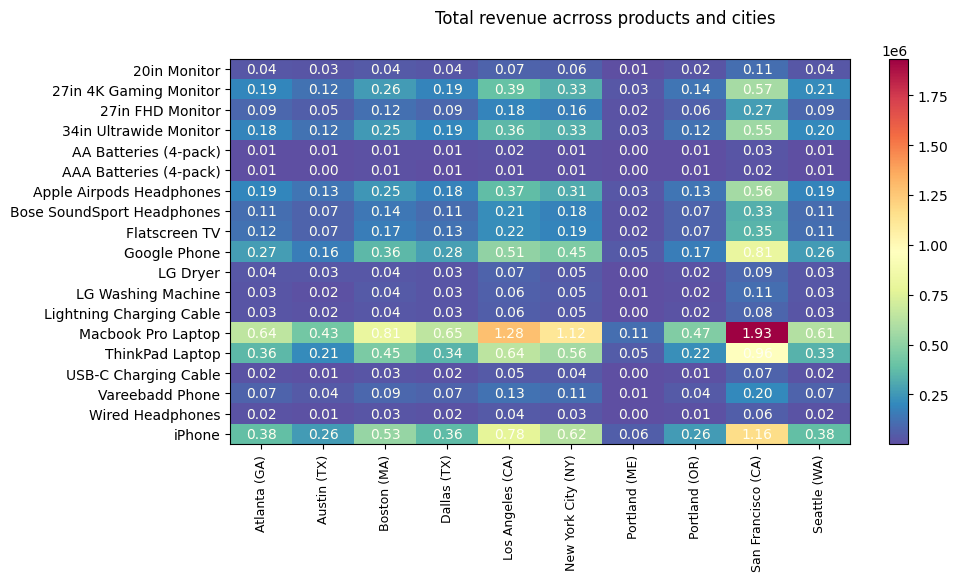

In [241]:
hm_data = prod_city_rev_df.values
cities = prod_city_rev_df.columns.to_list()
products = prod_city_rev_df.index.to_list()

fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle('Total revenue acrross products and cities')
hm = ax.imshow(hm_data, cmap = 'Spectral_r', aspect='auto')
ax.figure.colorbar(hm)
ax.set_xticks(range(len(cities)),labels=cities)
ax.set_yticks(range(len(products)),labels=products)
ax.tick_params(axis='x', labelrotation=90, labelsize=9)
for i in range(len(products)):
    for j in range(len(cities)):
        val = hm_data[i,j]/1000000
        ax.text(j,i,f"{val:.2f}",va='center',ha='center',color='ivory')
plt.show()

### Tasks to practice

1. Examine the distribution of total product purchases, in terms of total revenue, across the states. <br><br>
2. On which day, during a week, customers are likely to make most valuable orders?